In [123]:
# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve, auc
import seaborn as sns
import plotly.express as px
sns.set(palette='rainbow', context='talk')

from ipynb.fs.full.EDA import vowelData
from ipynb.fs.full.EDA import irisData
from ipynb.fs.full.EDA import breastcancerData



### Chose the dataset

In [124]:
#call one of the function to load the dataset
#df_, x ,y = vowelData ()
df_, x ,y = irisData ()
#df_, x ,y = breastcancerData()

# Apply OCC-SVM

In [104]:
#for vowels dataset
#target = 'feature12'
#for iris and breast_cancer
target = 'target'

print("The dataset selected has shape: " + str(df_.shape) + " and for each class "+ str(Counter(df_[target])))

The dataset selected has shape: (150, 5) and for each class Counter({0: 50, 1: 50, 2: 50})


### For multi-class datasets we need to select 1 target class and then set an smaller amount of outliers

In [105]:
df = df_.copy()
df[target]= (df[target]==1)
df = df.drop(df[df[target] == False].sample(frac=0.80).index)
x = df.drop(columns=target)
y = df[target]
Counter(df[target])

Counter({False: 20, True: 50})

### Now we proceed with the OCC-SVM

In [106]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [107]:
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 56
The number of records in the test dataset is 14
The training dataset has 14 records for the majority class and 42 records for the minority class.


In [109]:
for kernel in classical_kernels:
    classical_svc = OneClassSVM(kernel=kernel)
    classical_svc.fit(X_train, y_train)
    classical_score = classical_svc.score_samples(X_test)
    prediction = classical_svc.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)

    print('%s kernel classification accurancy:  %0.2f' % (kernel, accuracy))

linear kernel classification accurancy:  0.36
poly kernel classification accurancy:  0.36
rbf kernel classification accurancy:  0.36
sigmoid kernel classification accurancy:  0.36


#### Once we know which kernel performs better:

In [121]:
kernel  = 'linear'
classical_svc = SVC(kernel=kernel,probability=True)
classical_svc.fit(X_train, y_train)
classical_score = classical_svc.score(X_test, y_test)

train_prediction = classical_svc.predict(X_train)
test_prediction = classical_svc.predict(X_test)

accuracy = accuracy_score(y_test,prediction)

In [113]:
# Check the model performance
print(classification_report(y_test, test_prediction))

              precision    recall  f1-score   support

       False       1.00      0.83      0.91         6
        True       0.89      1.00      0.94         8

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



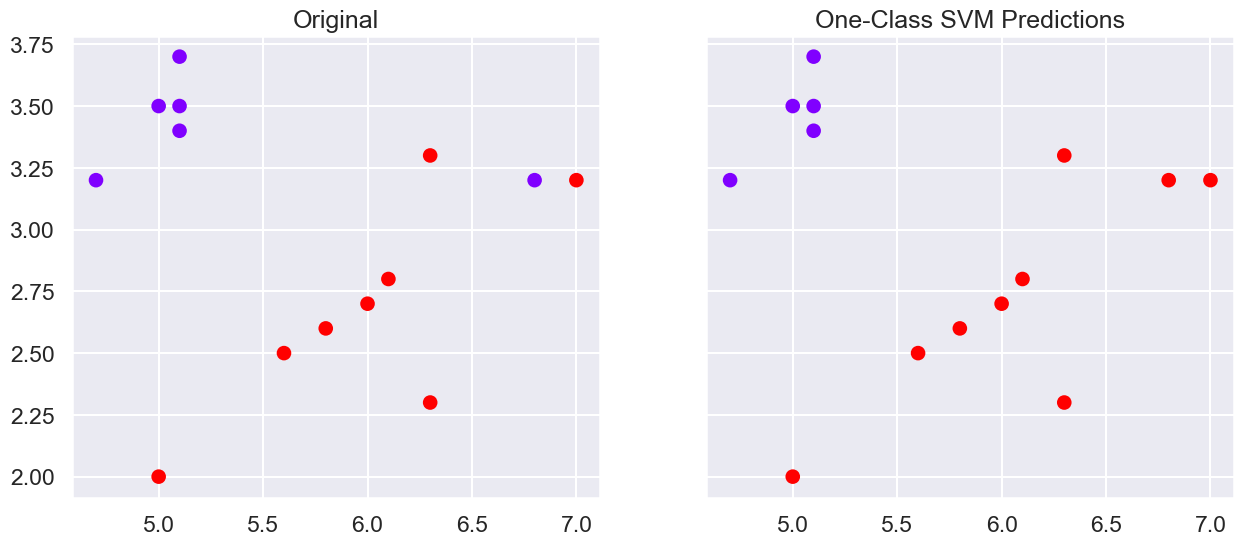

In [114]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=[0, 1])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = test_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(15,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test[0], df_test[1], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test[0], df_test[1], c=df_test['one_class_svm_prediction'], cmap='rainbow')


### F1-Score

In [118]:
print('The accurancy is: ',accuracy_score(y_test,test_prediction))
print('Precision is: ', precision_score(y_test,test_prediction))
print('Recall is: ', recall_score(y_test,test_prediction))
print('F1 is: ', f1_score(y_test,test_prediction))

The accurancy is:  0.9285714285714286
Precision is:  0.8888888888888888
Recall is:  1.0
F1 is:  0.9411764705882353


### ROC-curve

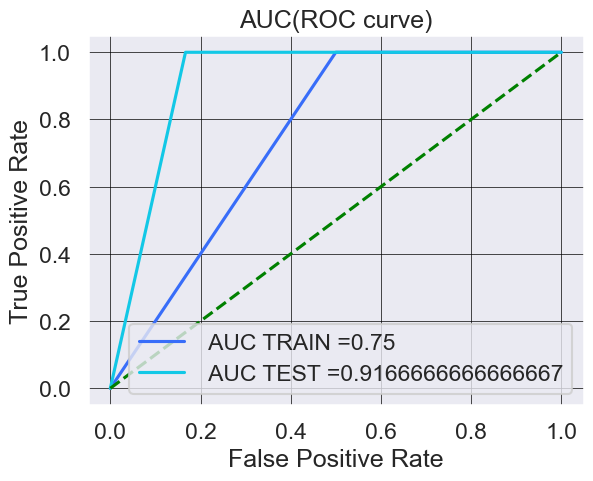

In [122]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, train_prediction)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, test_prediction)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()